In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from skimage.io import imread
from skimage.io import imsave

In [16]:
ni = imread('./Ni-Calibration.jpg')

niIntensity = ni[:,754]

niIntensity = list(map(lambda x: 255 - x, niIntensity))

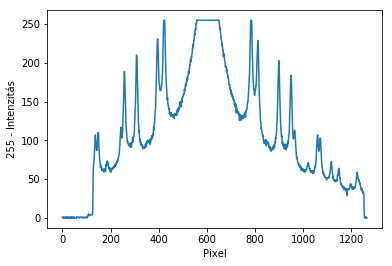

In [62]:
plt.plot(niIntensity)
xlabel('Pixel')
ylabel('255 - Intenzitás')

savefig('./kalib.png')

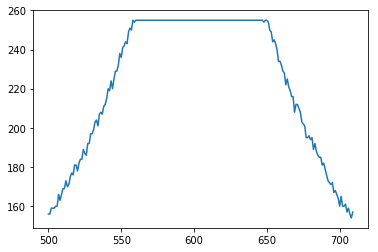

In [108]:
fr = 500
to = 710
plt.plot(np.arange(fr, to, step=1), niIntensity[fr:to])

Illesztés:  [ 2.58644470e+03  6.04001002e+02  2.90795628e-03 -2.32393845e+03] 
Hiba:  [5.49000138e+03 3.51462796e-01 3.14578549e-03 5.49050883e+03]


/home/qbeer666/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


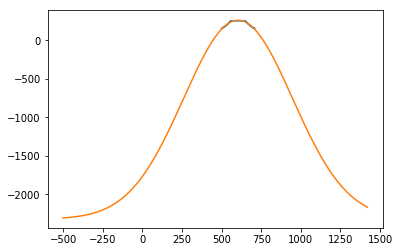

In [125]:
def gaussPlusB(x, A, mu, sigma, B):
    return A*np.exp(-(x - mu)**2 / 2*sigma**2 ) + B

from scipy.optimize import curve_fit

fr = 500
to = 710

popt, pcov = curve_fit(gaussPlusB, np.arange(fr, to, step=1), niIntensity[fr:to],
                       p0 = [160.1, 600, 0.10, 130.])
perr = diag(sqrt(pcov))

print('Illesztés: ', popt, '\nHiba: ', perr)

plt.plot(np.arange(fr, to, step=1), niIntensity[fr:to])
plt.plot(np.arange(-fr, 2*to, step=0.1), gaussPlusB(np.arange(-fr, 2*to, step=0.1), *popt))

Egyenes illesztve:  [368.1562162] 
Hiba: [0.21197136]


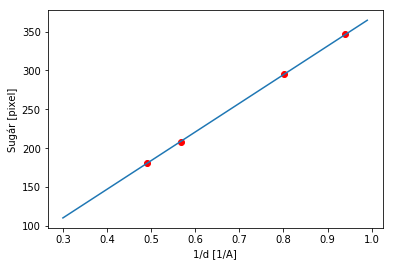

In [140]:
d = np.array([2.037180, 1.76425, 1.24751, 1.06388])
R = [180.62, 208.23, 295.36, 346.16]
Rerr = [0.13, 0.1, 0.07, 0.12]

plt.plot(1./d, R, 'ro')

def egyenes(x, a):
    return a*x

popt, pcov = curve_fit(egyenes, 1./d, R)
perr = sqrt(diag(pcov))

print('Egyenes illesztve: ', popt, '\nHiba:', perr)

plt.plot(np.arange(0.3, 1, step=0.01), egyenes(np.arange(0.3, 1, step=0.01), *popt))

xlabel('1/d [1/A]')
ylabel('Sugár [pixel]')

savefig('./kalib_egyenes.png')